In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv('heart_2020_cleaned.csv')
print(df.shape)
df.head(10)


(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
# Info and basic summary
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [4]:
# Missing values overview
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df) * 100).round(2)
missing = pd.DataFrame({'count': missing_counts, 'percent': missing_pct})
missing[missing['count'] > 0]


,count,percent


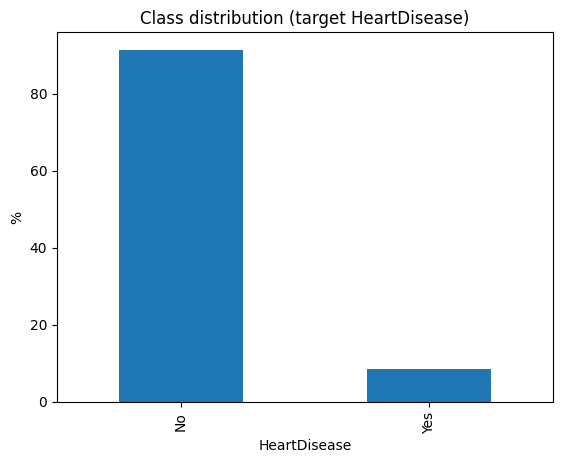

In [5]:
# Class balance
ax = (df['HeartDisease'] == 'Yes').value_counts(normalize=True).mul(100).rename({True:'Yes', False:'No'}).plot(kind='bar')
ax.set_ylabel('%')
ax.set_title('Class distribution (target HeartDisease)')
plt.show()


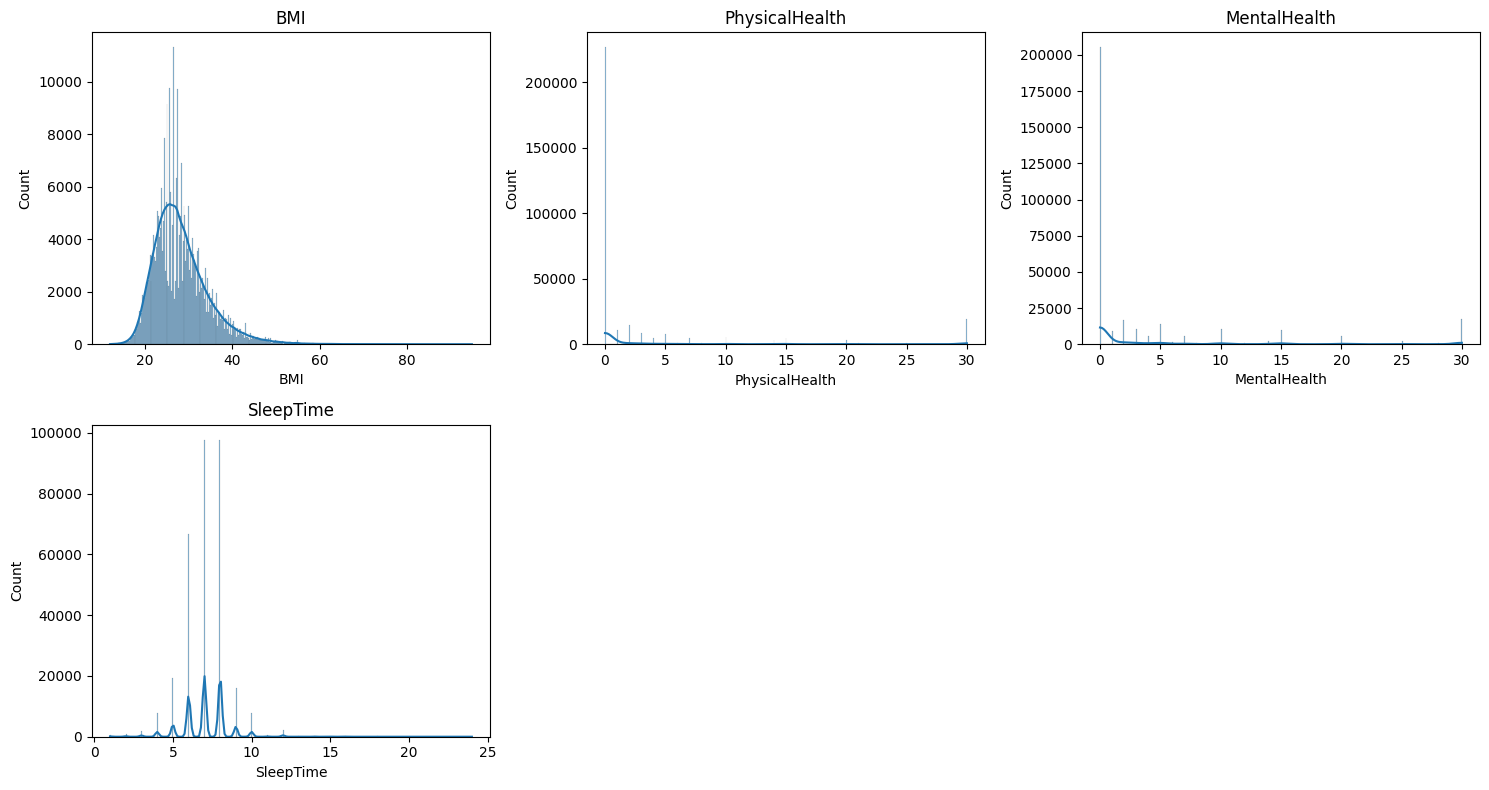

In [6]:
# Numeric distributions
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_columns)/3)), ncols=3, figsize=(15, 4*int(np.ceil(len(numeric_columns)/3))))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()


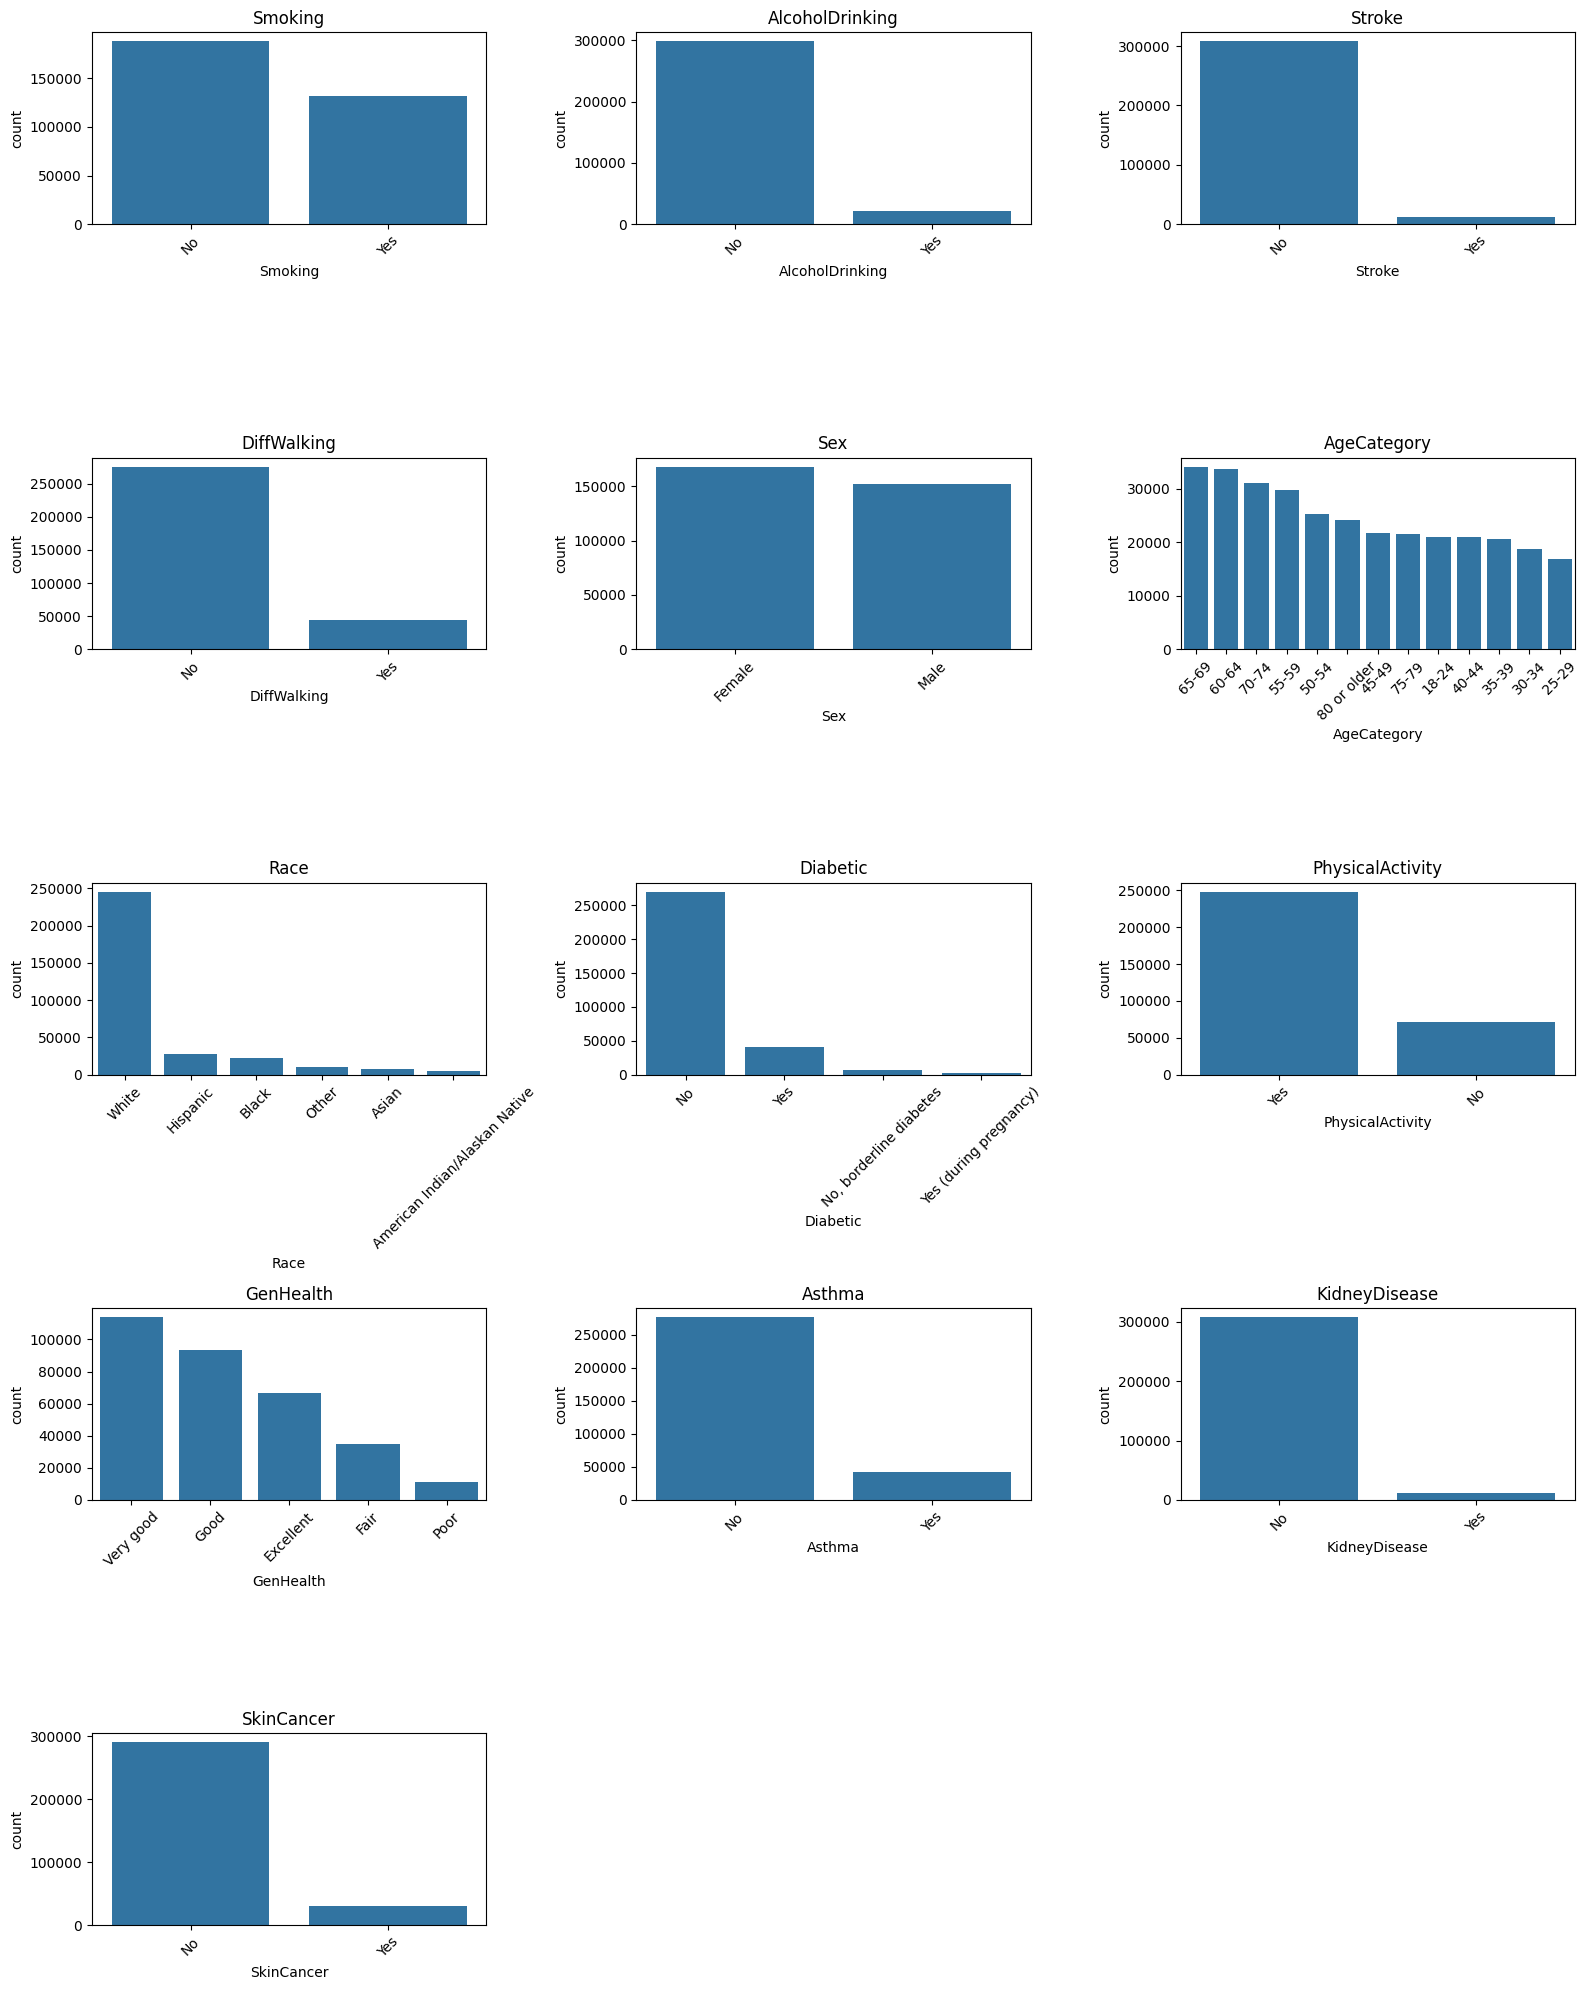

In [7]:
# Categorical distributions (top categories)
categorical_columns = df.select_dtypes(include=['object']).columns
cat_cols_no_target = categorical_columns.drop('HeartDisease')

ncols = 3
nrows = int(np.ceil(len(cat_cols_no_target)/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4*nrows))
axes = axes.flatten()
for i, col in enumerate(cat_cols_no_target):
    order = df[col].value_counts().index[:15]
    sns.countplot(data=df, x=col, order=order, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()


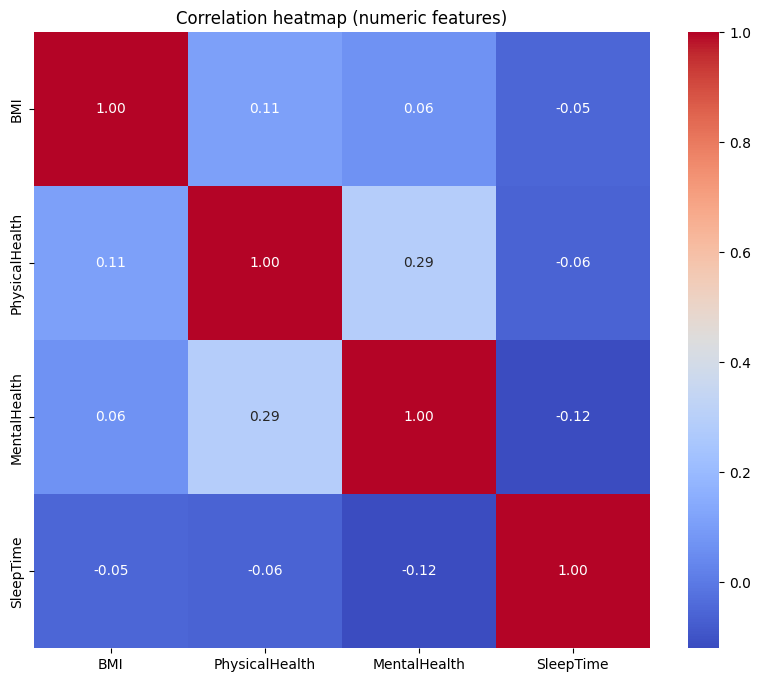

In [8]:
# Correlation heatmap for numeric features
corr = df.select_dtypes(include=["int64", "float64"]).corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation heatmap (numeric features)")
plt.show()


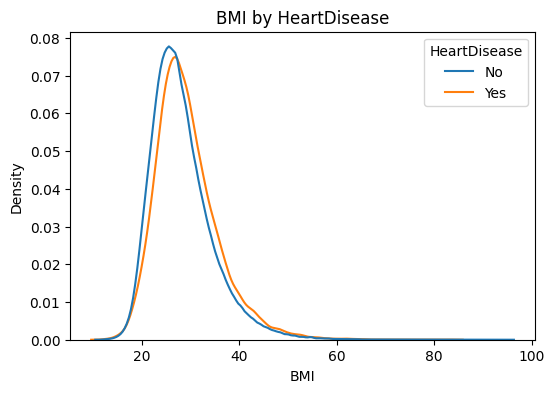

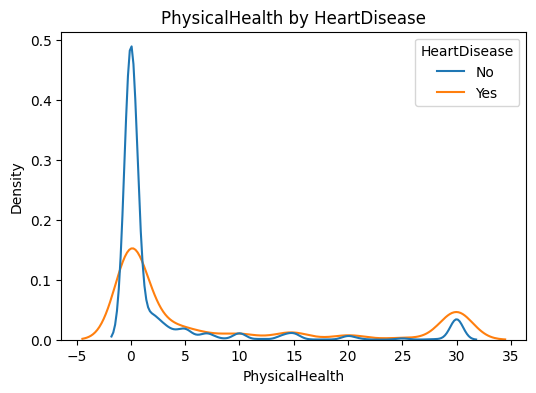

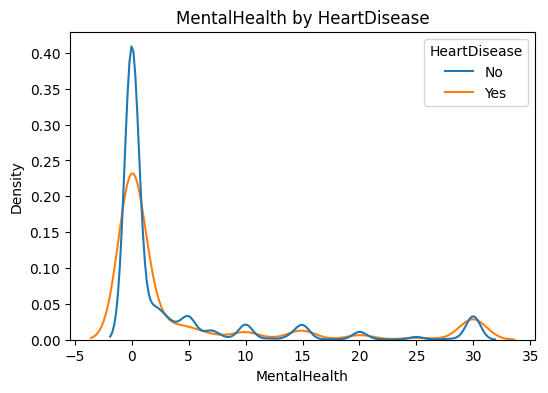

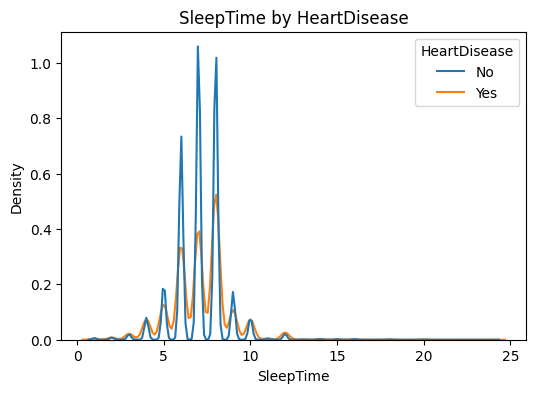

In [9]:
# Target relationships: numeric vs target
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, hue='HeartDisease', common_norm=False)
    plt.title(f"{col} by HeartDisease")
    plt.show()


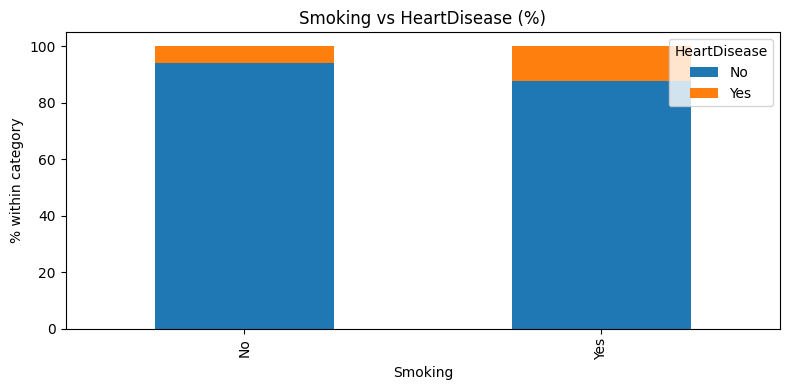

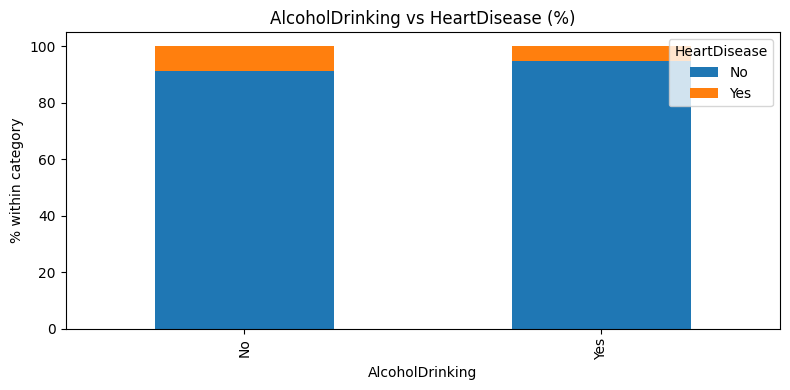

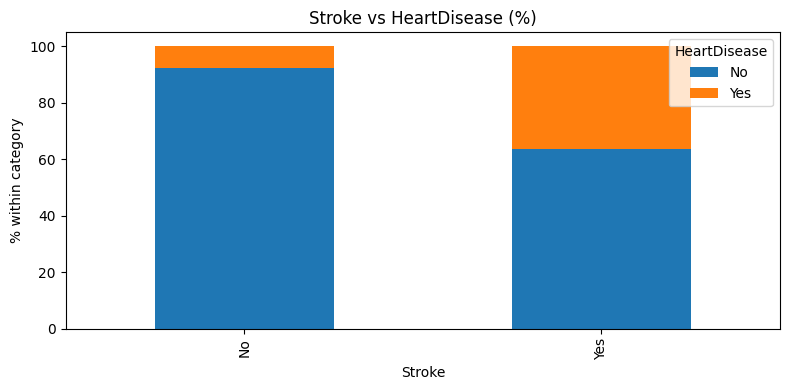

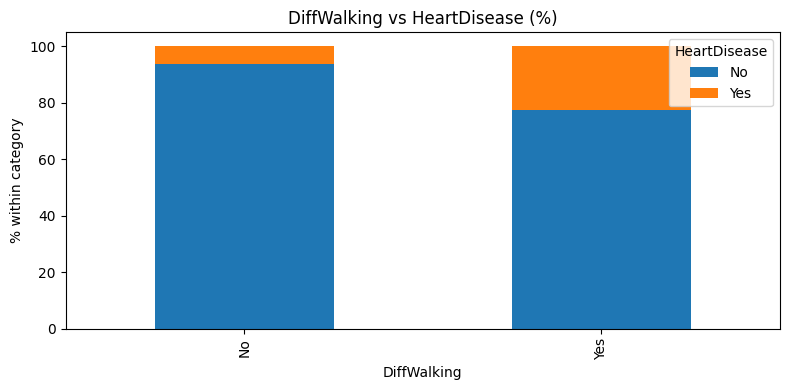

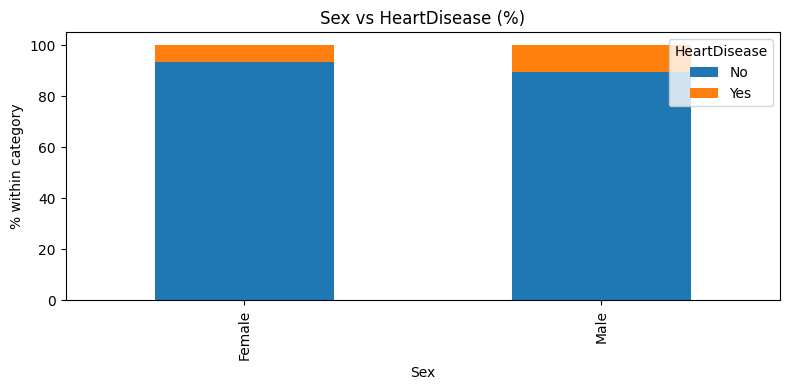

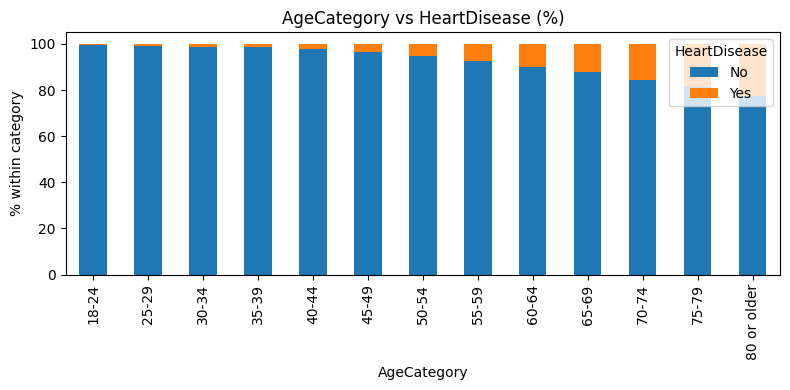

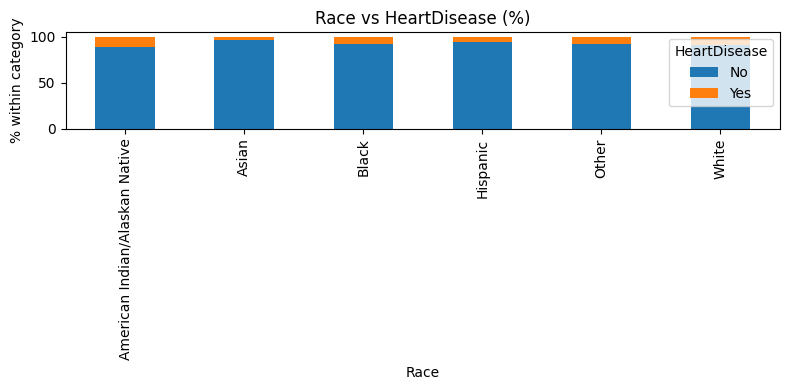

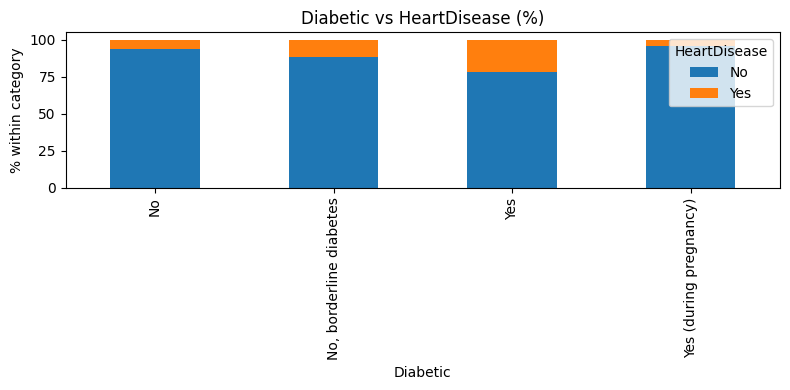

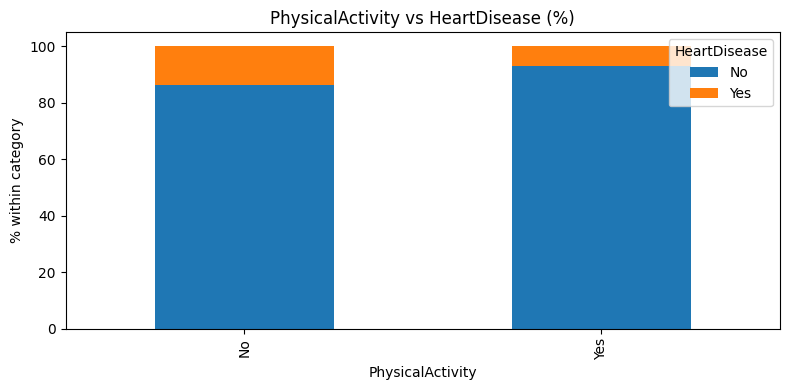

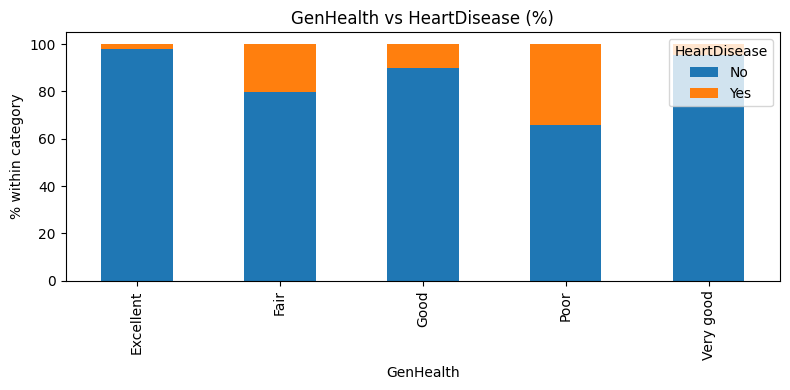

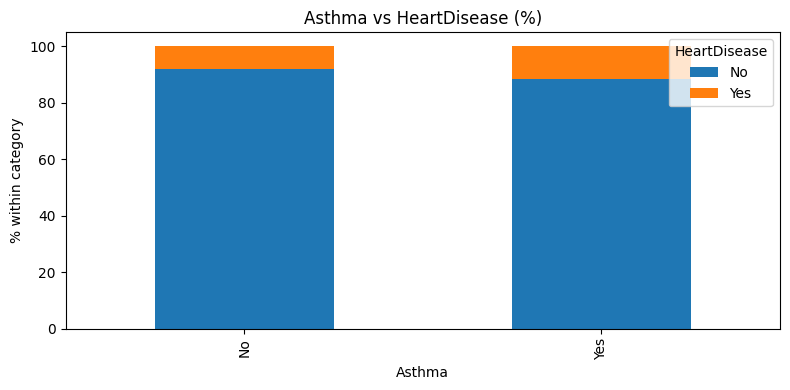

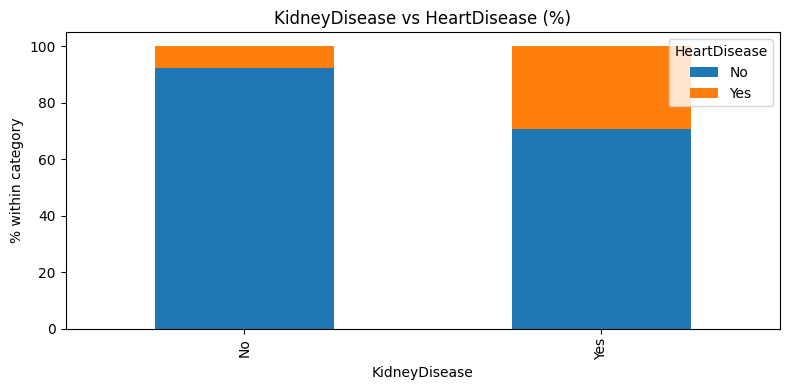

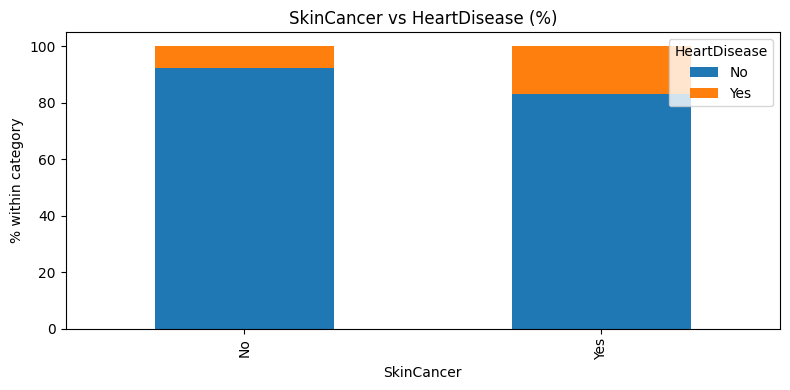

In [10]:
# Target relationships: categorical vs target (stacked percentages)
cat_cols = df.select_dtypes(include=['object']).columns.drop('HeartDisease')

for col in cat_cols:
    ct = pd.crosstab(df[col], df['HeartDisease'], normalize='index') * 100
    ct = ct[['No', 'Yes']] if 'No' in ct.columns and 'Yes' in ct.columns else ct
    ct.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f"{col} vs HeartDisease (%)")
    plt.ylabel('% within category')
    plt.legend(title='HeartDisease', loc='upper right')
    plt.tight_layout()
    plt.show()
